In [5]:
import tensorflow_datasets as tfds


In [3]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization,Dropout

import matplotlib.pyplot as plt
import os


In [6]:
(ds_train, ds_val), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.D1AYL4_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [7]:
print(ds_info)


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [8]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

train_ds = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [9]:
# create CNN model
model = Sequential()

# 1st Convolution + Pooling block
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    padding='valid',
    activation='relu',
    input_shape=(150, 150, 3)
))
model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2,
    padding='valid'
))

# 2nd Convolution + Pooling block
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    padding='valid',
    activation='relu'
))
model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2,
    padding='valid'
))

# 3rd Convolution + Pooling block
model.add(Conv2D(
    filters=128,
    kernel_size=(3, 3),
    padding='valid',
    activation='relu'
))
model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2,
    padding='valid'
))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# Output layer
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.5868 - loss: 0.6567 - val_accuracy: 0.7689 - val_loss: 0.4948
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.7734 - loss: 0.4762 - val_accuracy: 0.7951 - val_loss: 0.4348
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.8226 - loss: 0.3848 - val_accuracy: 0.7947 - val_loss: 0.4816
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.8685 - loss: 0.3050 - val_accuracy: 0.7941 - val_loss: 0.5946
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.9125 - loss: 0.2088 - val_accuracy: 0.7880 - val_loss: 0.6858


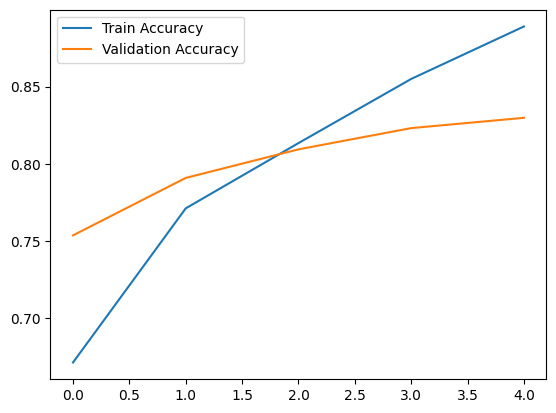

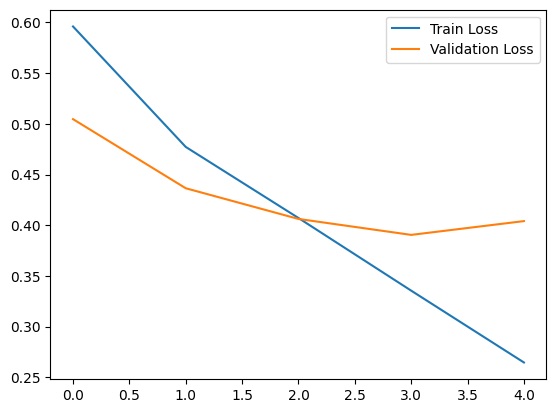

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
#ways to reduce overfitting
#Add more data
#Data augmentation
#L1/L2 regularizer
#Dropout
#Batch Normalization
#Reduce complexity

In [12]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,510,021 (55.35 MB)

 Trainable params: 4,836,673 (18.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,673,348 (36.90 MB)

Actual label: 1


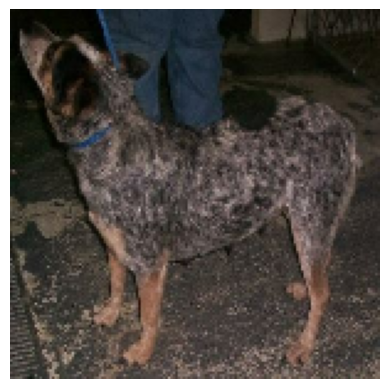

In [13]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in val_ds.take(1):
    sample_image = images[0]
    sample_label = labels[0]

plt.imshow(sample_image.numpy())
plt.axis('off')
print("Actual label:", sample_label.numpy())


In [14]:
img = tf.expand_dims(sample_image, axis=0)  # add batch dimension
prediction = model.predict(img)[0][0]

print("Raw prediction:", prediction)

if prediction > 0.5:
    print("Predicted: Dog 🐶")
else:
    print("Predicted: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw prediction: 0.0068272846
Predicted: Cat 🐱
